# Setup

## Look around

In [1]:
%ls

all_plots.ipynb
colab_extended_GPflow_pipeline.ipynb
colab_extended_grid_search_pipeline.ipynb
colab_reproducing_ci_gp.ipynb
colab_reproducing_ci_rf.ipynb
colab_reproducing_grid_search_pipeline.ipynb
eda.ipynb
prepare_extended_grid_search_results.ipynb
prepare_reproducing_grid_search_results.ipynb


In [2]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

## Import Modules

### Standard imports

In [3]:
import pickle
import json

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom imports

In [4]:
sys.path.insert(0, '..')

# plotting
from util_scripts.plotting_functions_and_vars import FIGSIZE_CI, FIGSIZE_HEATMAP, PLOTS_DIR
from util_scripts.plotting_functions_and_vars import datasets_to_titles, datasets_to_units, metrics_to_labels
from util_scripts.plotting_functions_and_vars import plot_algorithm_dataset_comparison_heatmap

sys.path.insert(0, './notebooks')

## CHOOSE dataset, smile_type, grid_search_type to visualize

In [5]:
# root = '../backup_results'
root = '../results'

In [6]:
dataset = 'lipophilicity'
assert dataset in ['freesolv', 'esol', 'lipophilicity']

smile_type = 'original'
assert smile_type in ['original', 'protonated']

grid_search_type = 'reproducing'
assert grid_search_type in ['reproducing', 'extended']

## Titles, Units and Labels for datasets

In [7]:
for key, value in datasets_to_titles.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  Solvation Energy
esol          :  Log Solubility
lipophilicity :  Octanol/Water Distribution Coefficient


In [8]:
for key, value in datasets_to_units.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  (kcal/mol)
esol          :  (mol/litre)
lipophilicity :  (logD)


In [9]:
for key, value in metrics_to_labels.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

RMSE          :  root-mean-square error
MAE           :  mean absolute error
R^2           :  R^2 (coefficient of determination)
pearson_r     :  Pearson correlation


## CHOOSE metric to display

In [10]:
metric = 'RMSE'
assert metric in metrics_to_labels

In [11]:
if metric in ['RMSE', 'MAE']:
    pass
else:
    # no units
    datasets_to_units = {'freesolv': '', 'esol': '', 'lipophilicity': ''}

## Load everything

In [12]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

In [13]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_val_scores.pickle', 'rb') as fp:
    val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_train_test_scores.pickle', 'rb') as fp:
    train_test_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_params.pickle', 'rb') as fp:
    best_params = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_grid_params.pickle', 'rb') as fp:
    params = pickle.load(fp)

In [14]:
best_params

{'1024ecfp-4': {'rf': {'rf__n_estimators': 500},
  'xgb': {'xgb__n_estimators': 100,
   'xgb__max_depth': 7,
   'xgb__learning_rate': 0.2},
  'krr': {'krr__alpha': 0.001},
  'gp': {'gp__kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}}}

In [15]:
# with open(f'{root}/{dataset}_{smile_type}_random_search_best_params.json', 'r') as f:
#     best_params = json.load(f)

# with open(f'{root}/{dataset}_{smile_type}_random_search_best_cv_scores.json', 'r') as f:
#     cv_scores = json.load(f)
    
# with open(f'{root}/{dataset}_{smile_type}_random_search_best_test_score.json', 'r') as f:
#     test_score = json.load(f)

Have a look at best parameters.

In [16]:
best_params['1024ecfp-4']

{'rf': {'rf__n_estimators': 500},
 'xgb': {'xgb__n_estimators': 100,
  'xgb__max_depth': 7,
  'xgb__learning_rate': 0.2},
 'krr': {'krr__alpha': 0.001},
 'gp': {'gp__kernel': RBF(length_scale=1) + WhiteKernel(noise_level=1)}}

Have a look at the scores

In [17]:
val_scores

{'1024ecfp-4': {'rf': {'fit_time': array([288.65043116, 278.72883391, 173.49422503]),
   'score_time': array([0.17657995, 0.20581412, 0.1237886 ]),
   'test_RMSE': array([-0.77817886, -0.85843584, -0.78466596]),
   'test_MAE': array([-0.59970491, -0.65581735, -0.60655747]),
   'test_R^2': array([0.5306891 , 0.49918833, 0.56852908]),
   'test_pearson_r': array([0.73118672, 0.71388332, 0.77164285])},
  'xgb': {'fit_time': array([21.98622727, 21.87724638, 14.08220172]),
   'score_time': array([0.04016232, 0.03581738, 0.02289939]),
   'test_RMSE': array([-0.78226551, -0.84769121, -0.78836076]),
   'test_MAE': array([-0.59137107, -0.65375292, -0.60827953]),
   'test_R^2': array([0.52574695, 0.51164671, 0.56445613]),
   'test_pearson_r': array([0.72650633, 0.72083297, 0.75296194])},
  'krr': {'fit_time': array([2.43701696, 2.37825322, 1.31612515]),
   'score_time': array([0.24996305, 0.2662077 , 0.14842224]),
   'test_RMSE': array([-0.82824068, -0.89714704, -0.85319783]),
   'test_MAE': arra

In [18]:
train_test_scores

{'1024ecfp-4': {'rf': {'fit_time': array([330.80014873, 325.62102604, 201.60219455]),
   'score_time': array([0.17976952, 0.20776224, 0.1221118 ]),
   'test_RMSE': array([-0.85953888, -0.78391285, -0.89462855]),
   'train_RMSE': array([-0.31384278, -0.31515634, -0.30753617]),
   'test_MAE': array([-0.62180754, -0.59839026, -0.69736208]),
   'train_MAE': array([-0.23683985, -0.23804281, -0.23142906]),
   'test_R^2': array([0.47170614, 0.49928241, 0.47190035]),
   'train_R^2': array([0.93213043, 0.93239285, 0.93425277]),
   'test_pearson_r': array([0.68974498, 0.71535498, 0.69549096]),
   'train_pearson_r': array([0.97889147, 0.9788045 , 0.97981304])},
  'xgb': {'fit_time': array([24.3690958 , 24.39726925, 15.78275752]),
   'score_time': array([0.03514647, 0.04553127, 0.02249265]),
   'test_RMSE': array([-0.80459484, -0.77287866, -0.91513262]),
   'train_RMSE': array([-0.34570129, -0.3428349 , -0.33571912]),
   'test_MAE': array([-0.59822389, -0.60311765, -0.68977477]),
   'train_MAE': a

Get the means over folds (cross_validate records the results as arrays even for one fold)

In [19]:
mean_val_scores = {features: {model: {record: np.abs(val_scores[features][model][record].mean()) for record in val_scores[features][model]} for model in val_scores[features]} for features in val_scores}
mean_train_test_scores = {features: {model: {record: np.abs(train_test_scores[features][model][record].mean()) for record in train_test_scores[features][model]} for model in train_test_scores[features]} for features in train_test_scores}

mean_train_test_scores

{'1024ecfp-4': {'rf': {'fit_time': 286.00778977076214,
   'score_time': 0.16988118489583334,
   'test_RMSE': 0.846026761770769,
   'train_RMSE': 0.31217842855526806,
   'test_MAE': 0.6391866257111939,
   'train_MAE': 0.2354372383366636,
   'test_R^2': 0.48096296770652297,
   'train_R^2': 0.9329253487952626,
   'test_pearson_r': 0.700196974802877,
   'train_pearson_r': 0.9791696691189067},
  'xgb': {'fit_time': 21.516374190648396,
   'score_time': 0.03439013163248698,
   'test_RMSE': 0.8308687074059141,
   'train_RMSE': 0.3414184339003847,
   'test_MAE': 0.6303721049711818,
   'train_MAE': 0.25750391073443485,
   'test_R^2': 0.4992608086420401,
   'train_R^2': 0.9197661907654964,
   'test_pearson_r': 0.7102134392429065,
   'train_pearson_r': 0.9672200917495846},
  'krr': {'fit_time': 2.967348337173462,
   'score_time': 0.2550480365753174,
   'test_RMSE': 0.8066841571425879,
   'train_RMSE': 0.2707439222493459,
   'test_MAE': 0.595428874811005,
   'train_MAE': 0.20268262393497902,
   'te

In [20]:
std_val_scores = {features: {model: {record: val_scores[features][model][record].std() for record in val_scores[features][model]} for model in val_scores[features]} for features in val_scores}
std_train_test_scores = {features: {model: {record: train_test_scores[features][model][record].std() for record in train_test_scores[features][model]} for model in train_test_scores[features]} for features in train_test_scores}

std_val_scores

{'1024ecfp-4': {'rf': {'fit_time': 52.104289448356155,
   'score_time': 0.03394399204462134,
   'test_RMSE': 0.03640094347106845,
   'test_MAE': 0.024993551816826883,
   'test_R^2': 0.028347646887345434,
   'test_pearson_r': 0.02420346596121016},
  'xgb': {'fit_time': 3.7005738003150026,
   'score_time': 0.007331530525318776,
   'test_RMSE': 0.029510407121328675,
   'test_MAE': 0.026342236137417745,
   'test_R^2': 0.02232600166683176,
   'test_pearson_r': 0.014001418298065975},
  'krr': {'fit_time': 0.5151016789261826,
   'score_time': 0.05211934662603384,
   'test_RMSE': 0.028484847364855945,
   'test_MAE': 0.02311111710242292,
   'test_R^2': 0.015120703314281248,
   'test_pearson_r': 0.0056377767476312075},
  'gp': {'fit_time': 32.352424641842774,
   'score_time': 0.2246389397970802,
   'test_RMSE': 0.012414156252409247,
   'test_MAE': 0.00870124881935863,
   'test_R^2': 0.01412610889005691,
   'test_pearson_r': 0.009458703673997476}}}

In [21]:
mean_val_scores

{'1024ecfp-4': {'rf': {'fit_time': 246.95783003171286,
   'score_time': 0.16872755686442056,
   'test_RMSE': 0.8070935536718714,
   'test_MAE': 0.6206932419489681,
   'test_R^2': 0.5328021710376456,
   'test_pearson_r': 0.7389042971306993},
  'xgb': {'fit_time': 19.31522512435913,
   'score_time': 0.032959699630737305,
   'test_RMSE': 0.8061058253790164,
   'test_MAE': 0.6178011728581929,
   'test_R^2': 0.5339499276554808,
   'test_pearson_r': 0.733433745878432},
  'krr': {'fit_time': 2.0437984466552734,
   'score_time': 0.22153099377950033,
   'test_RMSE': 0.8595285120389028,
   'test_MAE': 0.6419760694418325,
   'test_R^2': 0.4704114745845282,
   'test_pearson_r': 0.714757097673037},
  'gp': {'fit_time': 186.9842208226522,
   'score_time': 1.8223567803700764,
   'test_RMSE': 0.7404273650161276,
   'test_MAE': 0.5536692637676955,
   'test_R^2': 0.6065986481308828,
   'test_pearson_r': 0.7809086965126092}}}

# Visualization

## Plotting options

In [22]:
column_order = ['1024ecfp-4']

row_order = ['Random Forest', 'XGBoost', 'Kernel Ridge', 'Gaussian Process']
mapper = {
    'rf': 'Random Forest',
    'xgb': 'XGBoost',
    'krr': 'Kernel Ridge',
    'gp': 'Gaussian Process'
}

## Train metric

In [23]:
## pull out train scores for all features for all models (train set is the train set when working on train/test split )
train_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'train_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
train_metric.round(2)

RMSE : root-mean-square error , unit: (logD)


,1024ecfp-4
gp,0.06
krr,0.27
rf,0.31
xgb,0.34


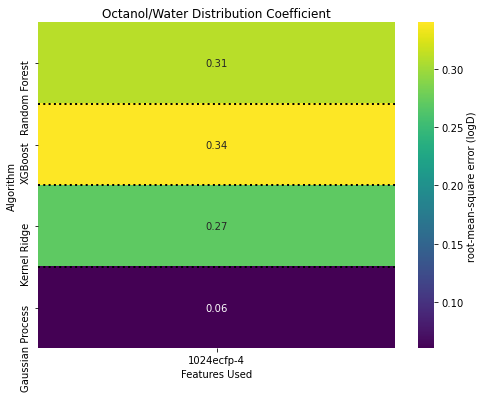

In [24]:
df = train_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Val metric

In [25]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
val_metric = pd.DataFrame({features: {model: mean_val_scores[features][model][f'test_{metric}'] for model in mean_val_scores[features]} for features in mean_val_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
val_metric.round(2)

RMSE : root-mean-square error , unit: (logD)


,1024ecfp-4
gp,0.74
krr,0.86
rf,0.81
xgb,0.81


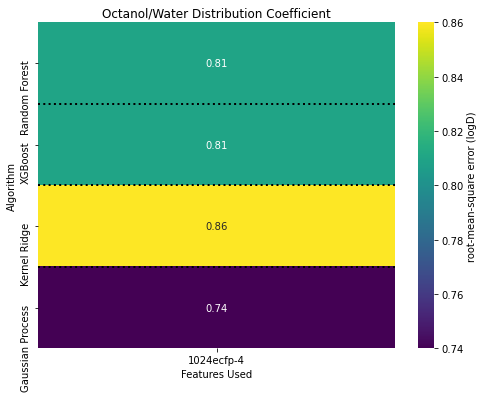

In [26]:
df = val_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Test metric

In [27]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
test_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'test_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
test_metric.round(2)

RMSE : root-mean-square error , unit: (logD)


,1024ecfp-4
gp,0.73
krr,0.81
rf,0.85
xgb,0.83


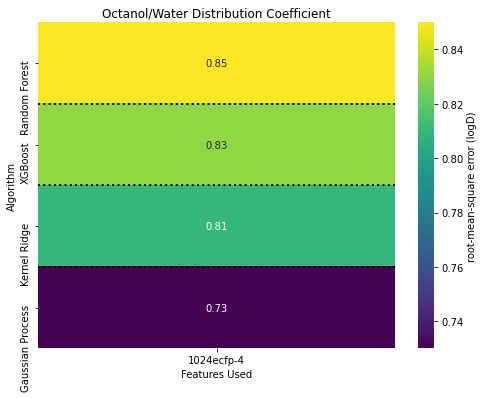

In [28]:
df = test_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

# Creating a table with all the scores

## Train and test scores data frame

In [29]:
train_test_means_df = pd.DataFrame(mean_train_test_scores['1024ecfp-4']).T
train_test_stds_df = pd.DataFrame(std_train_test_scores['1024ecfp-4']).T

train_test_stds_df

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r
rf,59.721209,0.035659,0.046198,0.003326,0.042233,0.002876,0.012954,0.000945,0.010972,0.000456
xgb,4.054296,0.009421,0.060974,0.004196,0.042052,0.003697,0.037927,0.001640,0.024520,0.000582
krr,0.549652,0.064418,0.077255,0.003429,0.053226,0.002618,0.059657,0.001150,0.034160,0.000522
gp,47.270695,0.270743,0.055314,0.007523,0.048058,0.005486,0.031497,0.000645,0.019483,0.000233


## Validation scores data frame

### Changing col names to 'val_\*' form 'test_\*'

In [30]:
val_means_df = pd.DataFrame(mean_val_scores['1024ecfp-4']).T
val_stds_df = pd.DataFrame(std_val_scores['1024ecfp-4']).T

val_stds_df

,fit_time,score_time,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,52.104289,0.033944,0.036401,0.024994,0.028348,0.024203
xgb,3.700574,0.007332,0.029510,0.026342,0.022326,0.014001
krr,0.515102,0.052119,0.028485,0.023111,0.015121,0.005638
gp,32.352425,0.224639,0.012414,0.008701,0.014126,0.009459


In [31]:
val_means_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df

,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,0.036401,0.024994,0.028348,0.024203
xgb,0.029510,0.026342,0.022326,0.014001
krr,0.028485,0.023111,0.015121,0.005638
gp,0.012414,0.008701,0.014126,0.009459


In [32]:
col_names = list(val_means_df.columns)
col_names

['test_RMSE', 'test_MAE', 'test_R^2', 'test_pearson_r']

In [33]:
new_col_names = []
for name in col_names:
    new_col_names.append(name.replace("test", "val"))
    
new_col_names

['val_RMSE', 'val_MAE', 'val_R^2', 'val_pearson_r']

### Ready validation data frame

In [34]:
val_means_df.columns = new_col_names
val_stds_df.columns = new_col_names

val_stds_df

,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,0.036401,0.024994,0.028348,0.024203
xgb,0.029510,0.026342,0.022326,0.014001
krr,0.028485,0.023111,0.015121,0.005638
gp,0.012414,0.008701,0.014126,0.009459


## All scores

In [35]:
all_means = pd.concat([train_test_means_df, val_means_df], axis = 1)
all_stds = pd.concat([train_test_stds_df, val_stds_df], axis = 1)

all_stds

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,59.721209,0.035659,0.046198,0.003326,0.042233,0.002876,0.012954,0.000945,0.010972,0.000456,0.036401,0.024994,0.028348,0.024203
xgb,4.054296,0.009421,0.060974,0.004196,0.042052,0.003697,0.037927,0.001640,0.024520,0.000582,0.029510,0.026342,0.022326,0.014001
krr,0.549652,0.064418,0.077255,0.003429,0.053226,0.002618,0.059657,0.001150,0.034160,0.000522,0.028485,0.023111,0.015121,0.005638
gp,47.270695,0.270743,0.055314,0.007523,0.048058,0.005486,0.031497,0.000645,0.019483,0.000233,0.012414,0.008701,0.014126,0.009459


In [36]:
col_order = ['fit_time', 'score_time']
temp = [[f'train_{metric}', f'val_{metric}', f'test_{metric}'] for metric in metrics_to_labels]

for l in temp:
    col_order.extend(l)
    
col_order

['fit_time',
 'score_time',
 'train_RMSE',
 'val_RMSE',
 'test_RMSE',
 'train_MAE',
 'val_MAE',
 'test_MAE',
 'train_R^2',
 'val_R^2',
 'test_R^2',
 'train_pearson_r',
 'val_pearson_r',
 'test_pearson_r']

In [37]:
all_means = all_means[col_order]
all_stds = all_stds[col_order]

all_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,59.721209,0.035659,0.003326,0.036401,0.046198,0.002876,0.024994,0.042233,0.000945,0.028348,0.012954,0.000456,0.024203,0.010972
xgb,4.054296,0.009421,0.004196,0.029510,0.060974,0.003697,0.026342,0.042052,0.001640,0.022326,0.037927,0.000582,0.014001,0.024520
krr,0.549652,0.064418,0.003429,0.028485,0.077255,0.002618,0.023111,0.053226,0.001150,0.015121,0.059657,0.000522,0.005638,0.034160
gp,47.270695,0.270743,0.007523,0.012414,0.055314,0.005486,0.008701,0.048058,0.000645,0.014126,0.031497,0.000233,0.009459,0.019483


## Presentable version

In [38]:
presentable_all_means = np.round(all_means, 3)
presentable_all_stds = np.round(all_stds, 3)

In [39]:
print(dataset, smile_type, grid_search_type)

print('\nMeans:')
display(presentable_all_means)

print('Standard deviations:')
display(presentable_all_stds)

lipophilicity original reproducing

Means:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,286.008,0.170,0.312,0.807,0.846,0.235,0.621,0.639,0.933,0.533,0.481,0.979,0.739,0.700
xgb,21.516,0.034,0.341,0.806,0.831,0.258,0.618,0.630,0.920,0.534,0.499,0.967,0.733,0.710
krr,2.967,0.255,0.271,0.860,0.807,0.203,0.642,0.595,0.950,0.470,0.527,0.977,0.715,0.743
gp,259.156,2.055,0.063,0.740,0.729,0.043,0.554,0.538,0.997,0.607,0.614,0.999,0.781,0.786


Standard deviations:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,59.721,0.036,0.003,0.036,0.046,0.003,0.025,0.042,0.001,0.028,0.013,0.000,0.024,0.011
xgb,4.054,0.009,0.004,0.030,0.061,0.004,0.026,0.042,0.002,0.022,0.038,0.001,0.014,0.025
krr,0.550,0.064,0.003,0.028,0.077,0.003,0.023,0.053,0.001,0.015,0.060,0.001,0.006,0.034
gp,47.271,0.271,0.008,0.012,0.055,0.005,0.009,0.048,0.001,0.014,0.031,0.000,0.009,0.019


In [40]:
presentable_all_means_stds = presentable_all_means.copy()
for i in presentable_all_means_stds.index:
    for j in presentable_all_means_stds.columns:
        presentable_all_means_stds.loc[i, j] = str(presentable_all_means.loc[i, j]) + ' +/- ' + str(presentable_all_stds.loc[i, j])
        
presentable_all_means_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,286.008 +/- 59.721,0.17 +/- 0.036,0.312 +/- 0.003,0.807 +/- 0.036,0.846 +/- 0.046,0.235 +/- 0.003,0.621 +/- 0.025,0.639 +/- 0.042,0.933 +/- 0.001,0.533 +/- 0.028,0.481 +/- 0.013,0.979 +/- 0.0,0.739 +/- 0.024,0.7 +/- 0.011
xgb,21.516 +/- 4.054,0.034 +/- 0.009,0.341 +/- 0.004,0.806 +/- 0.03,0.831 +/- 0.061,0.258 +/- 0.004,0.618 +/- 0.026,0.63 +/- 0.042,0.92 +/- 0.002,0.534 +/- 0.022,0.499 +/- 0.038,0.967 +/- 0.001,0.733 +/- 0.014,0.71 +/- 0.025
krr,2.967 +/- 0.55,0.255 +/- 0.064,0.271 +/- 0.003,0.86 +/- 0.028,0.807 +/- 0.077,0.203 +/- 0.003,0.642 +/- 0.023,0.595 +/- 0.053,0.95 +/- 0.001,0.47 +/- 0.015,0.527 +/- 0.06,0.977 +/- 0.001,0.715 +/- 0.006,0.743 +/- 0.034
gp,259.156 +/- 47.271,2.055 +/- 0.271,0.063 +/- 0.008,0.74 +/- 0.012,0.729 +/- 0.055,0.043 +/- 0.005,0.554 +/- 0.009,0.538 +/- 0.048,0.997 +/- 0.001,0.607 +/- 0.014,0.614 +/- 0.031,0.999 +/- 0.0,0.781 +/- 0.009,0.786 +/- 0.019


In [41]:
print(dataset, smile_type, grid_search_type)
print(metric, datasets_to_units[dataset])
presentable_all_means_stds_rmse = presentable_all_means_stds[['train_RMSE', 'val_RMSE', 'test_RMSE']]
display(presentable_all_means_stds_rmse)

lipophilicity original reproducing
RMSE (logD)


,train_RMSE,val_RMSE,test_RMSE
rf,0.312 +/- 0.003,0.807 +/- 0.036,0.846 +/- 0.046
xgb,0.341 +/- 0.004,0.806 +/- 0.03,0.831 +/- 0.061
krr,0.271 +/- 0.003,0.86 +/- 0.028,0.807 +/- 0.077
gp,0.063 +/- 0.008,0.74 +/- 0.012,0.729 +/- 0.055


# Save results to csv files

## All results

In [42]:
presentable_all_means.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means.csv', index=True)

In [43]:
presentable_all_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_stds.csv', index=True)

In [44]:
presentable_all_means_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means_pm_stds.csv', index=True)

## RMSE results (means +- stds)

In [48]:
presentable_all_means_stds_rmse.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means_pm_stds_rmse.csv', index=True)